# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [12]:
# TODO: Total number of records
n_records = np.shape(data)[0]
#n_records = data.value_counts()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = np.shape(data[data["income"] ==">50K"] )[0]
#n_greater_50k = data.income.value_counts()
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = np.shape(data[data['income']=="<=50K"])[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/float(n_records) *100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

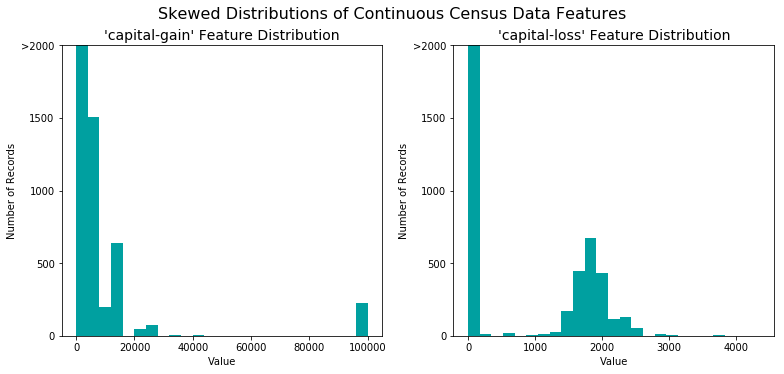

In [14]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)


For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

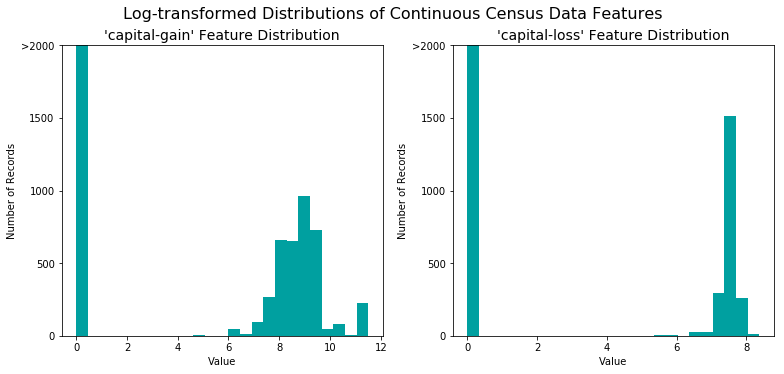

In [15]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [16]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [17]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace(">50K",1).replace("<=50K",0)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))
# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [18]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
X_train.describe()

C:\Python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 36177 samples.
Testing set has 9045 samples.


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,...,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,0.295748,0.607784,0.064755,0.042463,0.407585,0.032009,0.068828,0.735136,0.036598,0.084280,...,0.001299,0.004146,0.000498,0.002184,0.001299,0.000691,0.000580,0.913149,0.001907,0.000498
std,0.180940,0.170064,0.214988,0.190517,0.121700,0.176027,0.253165,0.441267,0.187775,0.277811,...,0.036021,0.064259,0.022301,0.046680,0.036021,0.026279,0.024086,0.281620,0.043631,0.022301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.410959,0.800000,0.000000,0.000000,0.448980,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [19]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = np.sum(income)/float(income.count())
recall = 1
precision = np.sum(income)/float(income.count())

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.25)*(precision*recall)/(0.25*precision+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** I'll write what I knew on each algorithm and recap in the end.

### Logistic Regression 

#### What is  logistic Regression ?
It's a classification Algorithm, used to predict discrete outcome given a set of categorical variables, we can think it as special case of Linear regression, except that it doesn't try to predict the value of a numeric variable given a set of inputs, Instead the output is a  probability that the given input point belongs to a certain class, by using a boundary( a line in 2D and plane in 3D).
The prediction is carried out using a non-linear function called the sigmoid function 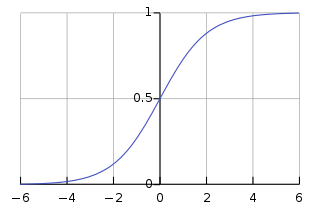
where $h_x(\theta) = g(\theta^{T}x) --> g(z)=\frac{1}{1+e^{-z}}$

#### How it works ?
###### To estimate the coefficients of the equation
1. Calculate a prediction using the current values of the coefficients 
2. Calculate new values of the coefficients based on the error in prediction

###### How the model update the coefficients(learning)
1. Batch learning 
    * Scan all data before building a model 
    * Data must be stored in memory or storage 
2. Online learning 
    * Model will be updated each data sample 
    * Sometimes the online model converges to the batch model 

###### measure the performance 
1. **R2 Score** It's how far your split deviate from the ideal model where : $R_{2} = 1-\frac{e_{curve}}{e_{simple}}$  
and your model is getting better as the R2 decreases 
2. **Accuracy** $Acc = \frac{TP+TN}{all data}$  
As the accuracy increase, the model is getting better 
3. **ROC** It's a curve that plots the sensitivity and 1-specificity, and as the area under the curve increases the predictive power increases 

#### Advantages 
* Fast and simple 
* very efficient in models with 1 Dimension boundary 
* Low variance so less pruning to over-fitting
* Provide probabilities to the outcomes 

#### Disadvantages 
* High Bias --> since it's very simple 
* Can't have continuous outcomes
* need large data sample 

#### Applications 
* Image segmentation 
* handwritten recognition 

#### Python code
```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
### after fitting we can use this line of code to know the coef of the model
clf.coef_
```

### K Nearest Neighbor
#### What is KNN ?
It's a simple algorithm that stores all available cases and classifies new cases based on a similarity measure, a case is classified by a majority vote of its neighbours.
It's an instance Based method where we keep the data and use it when we make a query 
###### How to choose K ?
Actually I don't know , In the course told us that using locally weighted regression we could draw a graph by taking k=n , and some guys told me that the best is to set $ k = \sqrt{n}$

#### How KNN works ?
1. Assign K a value - perferably a small odd number(still in doubt)
2. Find the closest number of k points 
3. Assign the new point from the majority of classes 

#### Advantage
* simple 
* Flexible to features 
* can handle multiclass cases easily
* can respond to the changes in inputs (lazy learner)

#### Disadvantages
* large time in search(query)
* storage of data 
* dimensionality curse 

#### Application
* ConceptSearch 
* Recommendation systems 

#### Python 
```python
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors = 3)
clf.fit(x,y)
###n_neighbors is the k value)
```

### Decision Tree
#### What is Decision Tree ?
It's an algorithm that simulates a graph that uses a branching method to illustrate eveery possible outcome of a decision
###### Types of Decision Trees ?
1. Categorical Variable Decision Tree 
2. Continous Variable Decision Tree 

###### Tree structure 
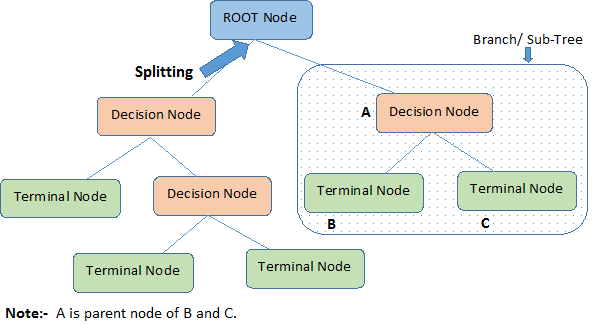

#### How Decision Tree works ?
Decision trees uses some algorithms one of them is ID3 where it uses the information gain to decide 

ID3 alg:
1. Calculate entropy of a node where  
$Entropy = -p log_2p-q log_2q$
2. The dataset is split on the different attributes 
3. choose attribute with the largest 
4. A branch with entropy more than 0 needs further splitting while the branch with 0 entropy is a leaf node 
5. The ID3 algorithm is run recursively on the non-leaf branches 

#### Advantage 
1. logarithmic runtime 
2. Non-linear features doesn't affect the model greatly 

#### Disadvantages 
The main disadvantage is overfitting 
in which we can overcome using 
1. **Tree Pruning** is removing sub-nodes of a decision nodes 
2. using **constraints on tree size** which are numbers defined the features to be used and the are: Minimum samples for anode split  - minimum samples for terminal node - maximum depth of the tree - maximum number of terminal node - max features to consider for split 

#### Applications 
Real time apllication example will be troubleshooting applications that use yes or no questions alot 

#### python code 
```python
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',random=0)
###criterion is how we measure the qualtiy of split 
### random is the random seed 
```


### Gaussian NB ( naive Bayes)
#### What is naive Bayes ?
- It's a classification technique  based on Bayes rule (explained later) with an assumption of Indepency among predictors.
- ###### Bayes Rule 
    - Bayes Theorem is a way to calculating posterior probability 
    
    $P(c|x)=\frac{P(x|c)*P(c)}{P(x)}$ , where :
    
    P(c|x) is the posterior probability of class given predictor
    
    P(c) is the prior probability of a class 
    
    P(x|c) is the likelihood which is the probability of predictor given the class 
    
    P(x) is the probability of predictor
    
#### How does naive Bayes work ?
1. Convert dataset into frequency table 
2. Fom a likelihood table (frequency of each category happening or not over the total number of that category)
3. Use Bayesian equation to calculate posterior probability and the class with high posterior probability is the outcome of prediction 

#### Advantages 
- fast (compared to the other models) --> it can be used in real time predictions 
- performs well in multiclass predictions --> it can be used in Multi class predictions  
- In case of Independent features or predictors it performs very well also in case of categorical data it performs very well compared to numerical data  --> it can be used in text classification , spam filtering and sentiment analysis.

#### Disadvantages & How to overcome them 
- if the categorical data has a variable that was not observed in training data , then model will assign 0 probability and will be unable to make a prediction --> we can apply smoothing techniques like "Laplace Correction" 
- probability outputs arent very accurate (bad estimator) --> You can use it whenever you don’t need the actual probabilities for each class, but only to know which is the most likely. so it cant help much in accurate probabilities
- It assumes that all predictor features are independent which is very NAIVE --> actually , I dont know :D but I think that it cant help if the predictors are dependent.
- It can't deal with numerical data unless it's normally distributed --> Use transformation or other method to make it normal.
- The data shouldn't be highly correlated as we will have a double vote issue --> remove correlated features 

#### Python coding 
**note :** Naive Bayes has 3 types :
1. Gaussian : It assumes features follow normal distribution 
2. Multinomial : It's used for discrete count 
3. Bernouli : Binomial model useful if the feature vectors are binary 

**Gaussian example**:

```python
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
```

### Stochastic gradient descent (SGDC)
#### what is SGDC ?
It's a linear model algorithm , that calculates the derivative from each training data instance and calculating the update immediately
#### How it works?
1. shuffle the dataset; Inorder to mix up the order in which the coefficients are updated 
2. Update the coefficients after each training instance, so the updates will be noisy jumping all over the place, and so will the corresponding cost function,so will neep more steps.By mixing up the order for the updates to the coefficients, it harnesses this random walk and avoids it getting distracted or stuck
3. It's similar to the gradient descent except the cost is not summed over all training patterns, but instead calculated for one training pattern

#### Advantages 
It's main advantages that it's way faster than the gradient descent so it's perfect for the large data set.
#### Disadvantages
it needs LARGE data in order to do well 
#### App
used mainly in big data applications
#### Python code 
there are three loss function in SGDClassifier
1. "hinge" which is linear supported vector machine , which is lazy so only updates the model parameters if an example violates the margin constraint
2. "modified_huber" It's similar to hinge except it's smooth 
3. "log" logistic regression  

```python
from sklearn.linear import SGDClassifier
clf = SGDClassifier(loss="log")
clf.fit(x,y)
```


### SVM
#### What is SVM ?
It's an algorithm to find a hyperplane that best divides the dataset into certain number of classes , by usin the nearest points to the hyperplane, In other words The goal of algorithm is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly
###### Kernel Trick 
In case that we can't linear sperate the classes we should use a kernel trick, and it's transfering the dataset to another dimension in order to seperate them 
#### Advantages
* High Accuracy
* works well on smaller cleaner dataset

#### Disadvantages
* Large training time , so it will be difficult to use it with large datasets
* It's very bad in noisy dataset 

#### Apps
SVM is used for text classification tasks such as category assignment, detecting spam and sentiment analysis. It is also commonly used for image recognition challenges, performing particularly well in aspect-based recognition and color-based classification. SVM also plays a vital role in many areas of handwritten digit recognition, such as postal automation services.

#### Python code
```python
from sklearn.svm import SVC
clf=SVC()
clf.fit(x,y)
```


### Ensemble lerning 
#### What is Ensemble learning ?
It's the combination of models in a single model, rather than having outcome of a single model we had the outcme of several models combined, because of it's good to learn once ,so it's better to learn several times in several ways.
###### Error in Ensemble learning 
The error emerging from any model can be broken down into three components mathematically.   
$Err(x)=(E[\hat(f)(x)] - f(x))^2+E[\hat(f)(x) - E[\hat(f)(x)]]^2+\sigma_e^2$  
$Err(x) = Bias^2+Variance+Irreducible Error$
1. **Variance** Models with a high variance overfit data i.e. it memorises the data. High variance implies that the model is sensitive to even small fluctuations in the data. Instead of having a generalized model, it models on the noise that is present in the data. Although it performs excellently on training data, its performance is worse on test data.
2. **Bias** Models having a high bias underfit the data. It means that it fails to take a note of the key relations between the features and the target variable. It is due to our inability to represent the true best predictor.
3. **Irreducible Error** It means the minimum error that can be achieved and cannot be further predicted. It relates to the inherent noise that is present in the data and represents a lower bound on the error of any learning algorithm

###### Tradeoff 
![model_complexity.png](attachment:model_complexity.png)

#### How Ensemble learning works ?
There are a lots of algorithms and techniques used for example:
###### Bagging
At first, multiple datasets are created by dividing the original data set. These datasets are then classified into various classes (Bootstrap) finally the classifiers are then combined to give a final prediction (Aggregation).
![Featured-Image-10-700x502.png](attachment:Featured-Image-10-700x502.png)

- **Main Advantage** It reduces the overfit , Since each of these bags doesn’t contain full information, it cannot memorize the complete training data. Even if the models overfit their ‘bags’, they do not overfit the entire training dataset.
- **Main Problem** One of the main problems in employing bagging is that it consumes a lot of resources. It is so because instead of one, we’re training several learners. If there are “k” samples, then the resource usage will approximately increase by k-fold.

###### AdaBoost
AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. When we collect the set of weak learners, we give equal weights to all of them. But on each round, the weights of incorrectly classified examples are increased so that the weak learner is forced to focus on the hard examples in the training set
We’re starting with a simple model- the learner, performs slightly better than chance-. For a binary classifier, ‘chance’ is 50% probability. The model should not leave white-noise  behind.
We’re making the model more complex as we iterate through the algorithm. We halt the process after we reach our required level of complexity.
![boosting.png](attachment:boosting.png)

- **Main Advantage** It decreases the bias Since Boosting keeps on predicting the errors and tries to approximate true-function.
- **Main Disadvantage** Actually by trying to fit the observations repeatedly it may overfit. 

###### Random Forest 
 Random Forest algorithm is a supervised ensemble classification algorithm.There are two stages in Random Forest algorithm, one is random forest creation, the other is to make a predictions.and here is the pseudocode:
1. Randomly select “K” features from total “m” features where k << m
2. Among the “K” features, calculate the node “d” using the best split point
3. Split the node into daughter nodes using the best split
4. Repeat the 1 to 3 steps until “l” number of nodes has been reached
5. Build forest by repeating steps 1 to 4 for “n” number times to create “n” number of trees
6. Take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome (target)
7. Calculate the votes for each predicted target
8. Consider the high voted predicted target as the final prediction from the random forest algorithm

**Main Advantages** Random Forest algorithm will avoid the overfitting problem 

###### Gradient Boosting 
We first model data with simple models and analyze data for errors.These errors signify data points that are difficult to fit by a simple model.Then for later models, we particularly focus on those hard to fit data to get them right.In the end, we combine all the predictors by giving some weights to each predictor. and here is the pseudocode:
1. Fit a simple linear regressor or decision tree on data
2. Calculate error residuals. Actual target value, minus predicted target value  
$e1= y - y_{predicted1}$
3. Fit a new model on error residuals as target variable with same input variables [call it $e1_{predicted}$]
4. Add the predicted residuals to the previous predictions
$y_{predicted2} = y_{predicted1} + e1_{predicted}$
5. Fit another model on residuals that is still left. i.e. $[e2 = y - y_{predicted2}]$ and repeat steps 2 to 5 until it starts overfitting or the sum of residuals become constant. Overfitting can be controlled by consistently checking accuracy on validation data.

###### Python code
**Bagging**
```python  
from sklearn.ensemble import BaggingClassifier
clf=BaggingClassifier(base_estimator=None,n_estimator = 10)
#when base estimator is none then it will use Decision trees
#n_estimator is the number of base estimators 
clf.fit(x,y)
```
**AdaBoost**
```python
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(base_estimator=None,n_estimator = 50)
#the parameters are the same as Bagging
```

**Random Forest**
```python
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estmators=10,criterion='gini',max_depth = None ,min_samples_split=2)
clf.fit(x,y)
##max_depth is The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all
#leaves contain less than min_samples_split samples
## min_samples_split is the min no. of samples required to split an internal node , if the number is int , But if it's
#float then it means the percentage 
```

**Gradient Boosting** 
loos function can be 
1. deviant which is used in logistic regrssion for classification with classification purposes
2. exponential which recovers AdaBoost algorithm (?)
```Python
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(loss='deviant')
```



### What I know about the data? 
1. it's output is Binary variable --> it's classification problem that needs a binary classifier
2. Total samples is 45,000 & train. is 36,000 & test is 9,000
which is somehow moderate size of data not too big but it's neither small 
3. Dimensions = 103 --> large
4. Linearity : actually I don't know if it's linearly separable or not and don't know how to check but I don't think its linearly separpable
5. dependency:It's surely dependent as we can't say that the education doesn't depend on education years or other features 
6. overfitting : I don't know if I should fear of overfitting or not but I will try to take care of it 
7. Resources : best resources --> I think that what I should look for (after the accuracy of course)

|Algorithms|data set size|numerical|dimensions|resources|features|overfitting|  
|----------|-------------|-----------|----------|---------|----------|----------|
|LogisticRegression|need large sample for good results|very good with them|not very good with large no of dim|very Low|best with linearly separable feat.|-|
|Decision tree|large data to avoid overfitting|can deal with them|small no. of dim. as large o. will cause overfit.|low|-| very prune to overfit|
|K Nearest Neighbor|-|-|not good for high dimensions|VERY high and getting higher as the data increase|It just needs normalized features to avoid one point to dominate the others|with the suitable K, we should be in safe side|
|Naive Bayes|It needs large data set|can deal with them|-|low|It need features to be normalized, also it can't deal with dependent features|-|
|Stochastic gradient descent|It needs VERY large dataset|very good with binary features as well as continous ones|can handle high dim|low|-|-|
|SVM|works very well on small dataset|vey good with them|can handle high dimensions|large resources in case of large dataset|need clean data|-|
|Ensemble(Random Forest)|handle both large and small datasets|very good with binary features as well as continous ones|handle high dimensions very well|-|-|very good in preventing overfitting|


- my data set isn't small (it's almost large) so my svm and lazy learners like KNN will take high resources (time in case of svm and time and space in case of KNN) 
- my data has a mix of normalized numberical data and binary data so Logistic Regression and svm is good choice for dealing with them, Actually there is no algorithm here that will face a problem with them, but these two deal very good with them 
- my data has 103 features so it won't be the best choice to work with logistic regression,Decision tree, and KNN 
- ofcourse I wont work with Naive Bayes as my data is dependent

**Then I will go with** Ensemble learning (actually there are lot's of algorithms that I think it will fit, but for one algorithm I will choose Random forest, because I didn't fully understand adaboost and Gradient boosting) - Stochastic gradient descent(even if it needs alot of tunning) - Logistic Regression

# Refrences:
- https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/
- https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/
- https://www.quora.com/What-is-logistic-regression
- https://www.youtube.com/watch?v=7qJ7GksOXoA
- https://onlinecourses.science.psu.edu/stat504/node/163
- https://github.com/ctufts/Cheat_Sheets/wiki/Classification-Model-Pros-and-Cons
- https://www.youtube.com/watch?v=SQOdBjjA2y8
- https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/
- http://www.saedsayad.com/k_nearest_neighbors.htm
- https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm
- https://brilliant.org/wiki/k-nearest-neighbors/#pros-and-cons
- http://www2.cs.man.ac.uk/~raym8/comp37212/main/node264.html
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.youtube.com/watch?v=JUUNQG4SXG4
- https://www.youtube.com/watch?v=b1sO1sxh1u4
- http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics
- https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes
- https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used
- https://machinelearningmastery.com/gradient-descent-for-machine-learning/
- https://www.coursera.org/learn/machine-learning/lecture/DoRHJ/stochastic-gradient-descent
- https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
- https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/
- https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/
- https://upxacademy.com/ensemble-learning-simplified/
- https://prateekvjoshi.com/2014/05/05/what-is-adaboost/
- https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674
- https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [43]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:int(sample_size)],y_train[:int(sample_size)])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 361.77 samples.
LogisticRegression trained on 3617.7 samples.
LogisticRegression trained on 36177 samples.
SGDClassifier trained on 361.77 samples.
SGDClassifier trained on 3617.7 samples.
SGDClassifier trained on 36177 samples.


C:\Python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RandomForestClassifier trained on 361.77 samples.
RandomForestClassifier trained on 3617.7 samples.
RandomForestClassifier trained on 36177 samples.


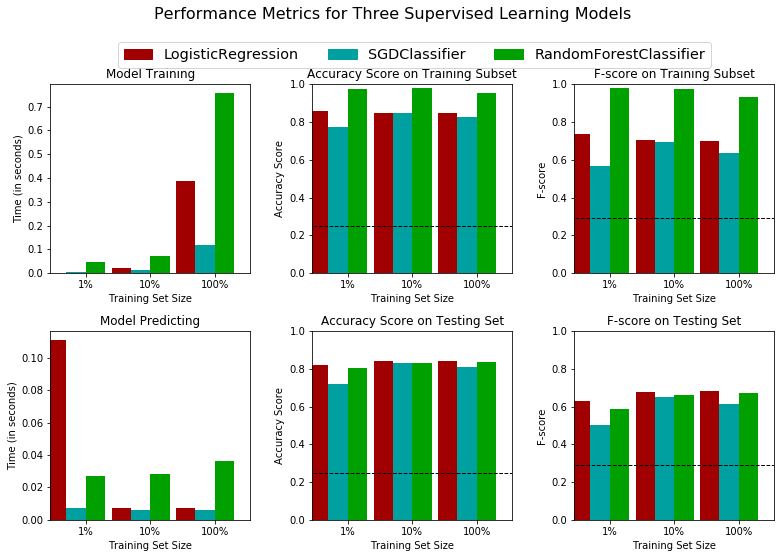

In [44]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
# TODO: Initialize the three models
clf_A =LogisticRegression(random_state=0)
clf_B = SGDClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)
# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = 0.1*samples_100
samples_1 = 0.01*samples_100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [30]:
len(y_train)

36177

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**
- On the F score and accuracy, I think both Logistic regression and random forest have the same score in testing, however the random forest was better on testing set.
- for prediction and train. time, there is not too much difference as the whole range between the largest and smallest is less than a minute in 100% dataset testing and prediction.
- I will choose Ensemble learning, as I believe after tuning it will be better, As the ensemble learning, can be tuned to change the acc and f score significantly 

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 
Random forest Is a learning Algorithm, which in simple words, asks a question like whether person A has income more or less than 50k, then we ask different questions, If he is too young or not, what is his education, whether he is male or female, and all these questions give us hints or in other words votes for the right answer, So after collecting these votes we will have a recommended class(with the majority voting) for person A that he probably belongs to .  

SO why Random Forest, not Decision trees for example ??, Actually decision tree requires a set of rules to solve the problem, which in our case is very problematic, Because we have lots of features which will result in overfitting, while the randomness of Random Forest solves this problem.The difference actually between them in how they works, the decision tree take all the data and use it's all features to form a decision , while the random forest is foring more than one tree each takes a random features and each make a decision and by voting we can make a decision 

**References**
* http://blog.echen.me/2011/03/14/laymans-introduction-to-random-forests/
* http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [75]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'alpha': [0.001, 0.01,0.1,0.5] ,'penalty': ['l1','l2','elasticnet'],'loss':['log','modified_huber']}
#parameters = {'penalty':['l2','l1'],'C':[0.01,0.1,1,10,100],'fit_intercept':[True,False]}
parameters ={"n_estimators": [2,25,75,125,175,200],
              "min_samples_leaf": [2,5,10,15,20],
              "criterion":["gini","entropy"],
            }
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8377
F-score on testing data: 0.6716

Optimized Model
------
Final accuracy score on the testing data: 0.8601
Final F-score on the testing data: 0.7295


In [76]:
#used to modify the range of min_samples_leaf and n_estimators, because calculating the best parameters on a large scale took along time.
print(best_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.8377        |     0.8601      |
| F-score        |     0.6716        |     0.7295      |


**Answer: **
* Yes, It's better than the unoptimized model 
* It's far better than the naive Bayes model 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
1. Capital-gain
2. Capital-loss
3. Occupation
4. Workclass
5. native-country  

Capital-gain and loss will have great effect on the total income, also the occupation, we can't believe that farming-fishing will make you an income equal to prof-specialty, Also work class, The one who is never worked will have income, finally the income varies according to the country as the average income in those countries varies 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

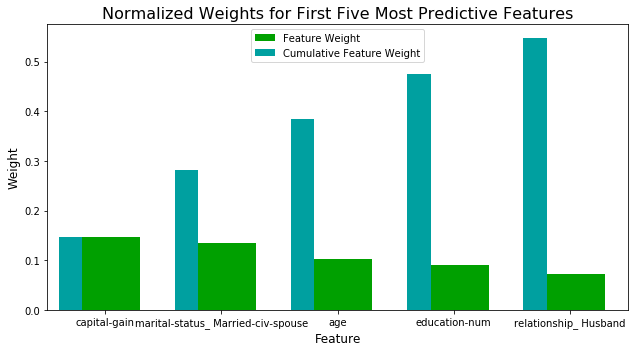

In [102]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model=best_clf
#model = RandomForestClassifier(random_state=0).fit(X_train,y_train)
#model = RandomForestClassifier().fit(X_train,y_train)
# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
* Only the capital-gain that I figured right :D 
* I wasn't, the capital gain has feature weight of almost 0.15 of 0.6 which is nearly the quarter of the top five weights(which confirms my thoughts) also 15% of the weight overall features , also the marital status which is about 0.14 which is more relevant since the married people  and especially the husbands will change your income completely, you will have more burdens and costs and you will have to have a good income, also the age, the income of more older people should be higher than that of the young people  
**#note** when I change the model parameters the graph changes alot 

|best_clf|weight|cumm. wight|
|--------|------|-----------|
|capital-gain|0.15|0.15|
|marital-status_Married-civ-spouse|0.14|0.29|
|age|0.12|0.41|
|education-num|0.1|0.51|
|relationship_Husband|0.07|0.58|

|normal without seed| weight| cumm. weight|
|------------------|--------|----------|
|age|0.24|0.24|
|hours_per_week|0.1|0.34|
|Marital-status_Married-civ-spouse|0.09|0.43|
|education-num|0.09|0.52|
|capital-gain|0.08|0.6|

|normal with seed|weight|cumm. weight|
|-------------|----------|----------|
|age|0.24|0.24|
|hours_per_week|0.11|0.35|
|capital-gain|0.1|0.45|
|relationship_Husband|0.08|0.53|
|Marital-status_Married-civ-spouse|0.07|0.6|

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [103]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8601
F-score on testing data: 0.7295

Final Model trained on reduced data
------
Accuracy on testing data: 0.8428
F-score on testing data: 0.6882


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
* the reduced data accuracy loses about 1.5% of its score and F-score decreased by 3%
* actually RandomForest is relatively fast algorithm so I won't use the reduced data in this situation, However, In other cases, I will put time factor into consideration 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.